In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [3]:
df = pd.read_csv("Top 1000 Bollywood Movies and their boxoffice.csv")
df.head()

,Unnamed: 0,SN,Movie,Worldwide,India Net,India Gross,Overseas,Budget,Verdict
0,0,1,Pathaan,10500000000,5240000000,6570000000,3920000000,2500000000,All Time Blockbuster
1,1,2,Baahubali 2 The Conclusion,17880000000,5100000000,14160000000,3710000000,2500000000,All Time Blockbuster
2,2,3,KGF Chapter 2,12080000000,4350000000,10000000000,2070000000,1000000000,All Time Blockbuster
3,3,4,Dangal,20700000000,3740000000,5350000000,15350000000,700000000,All Time Blockbuster
4,4,5,Sanju,5880000000,3420000000,4380000000,1500000000,1000000000,All Time Blockbuster


In [5]:
df["Verdict"].unique()

array(['All Time Blockbuster', 'Blockbuster', 'Hit', 'SuperHit',
       'Average', 'Below Average', 'Disaster', 'Flop', 'Above Average',
       '0'], dtype=object)

In [6]:
df.drop(df[df["Verdict"]== "0"].index, axis = 0, inplace = True)

In [7]:
df.shape

(949, 9)

In [8]:
(df["India Gross"] + df["Overseas"] == df["Worldwide"]).all()

np.False_

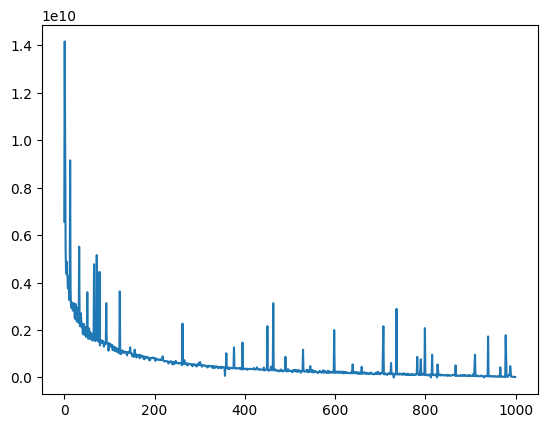

In [9]:
plt.plot(df["India Gross"])
plt.show()

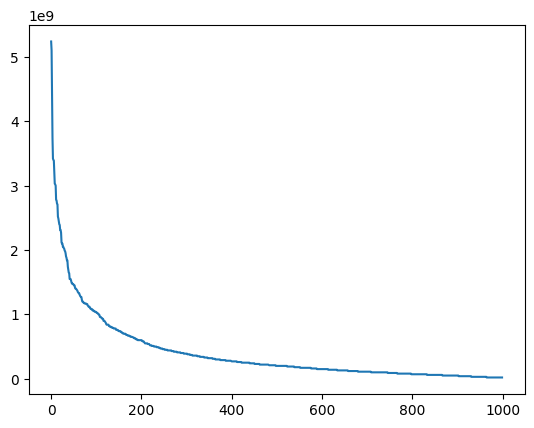

In [10]:
plt.plot(df["India Net"])
plt.show()

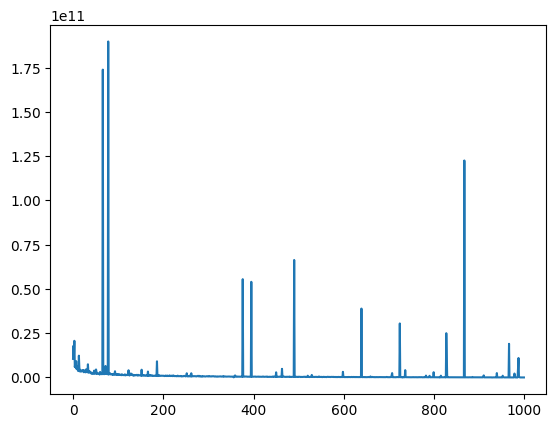

In [11]:
plt.plot(df["Worldwide"])
plt.show()

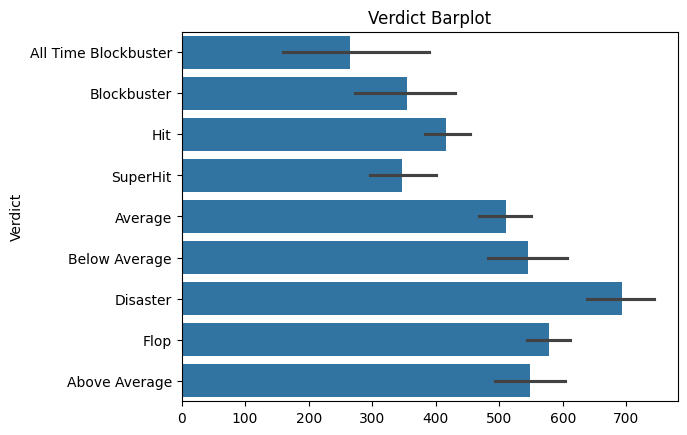

In [12]:
sns.barplot(df["Verdict"])
plt.title("Verdict Barplot")
plt.show()

In [13]:
df.describe()

,Unnamed: 0,SN,Worldwide,India Net,India Gross,Overseas,Budget
count,949.000000,949.000000,9.490000e+02,9.490000e+02,9.490000e+02,9.490000e+02,9.490000e+02
mean,487.105374,488.105374,1.634668e+09,4.230664e+08,6.330558e+08,8.433930e+08,5.174078e+08
std,286.193082,286.193082,1.002707e+10,5.890760e+08,9.990041e+08,8.496085e+09,1.839067e+09
min,0.000000,1.000000,0.000000e+00,2.000000e+07,0.000000e+00,0.000000e+00,0.000000e+00
25%,239.000000,240.000000,1.700000e+08,1.000000e+08,1.500000e+08,1.000000e+07,9.000000e+07
50%,484.000000,485.000000,3.800000e+08,2.100000e+08,3.200000e+08,5.000000e+07,2.000000e+08
75%,733.000000,734.000000,9.100000e+08,4.800000e+08,7.100000e+08,1.500000e+08,4.000000e+08
max,999.000000,1000.000000,1.897000e+11,5.240000e+09,1.416000e+10,1.690200e+11,3.200000e+10


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   949 non-null    int64 
 1   SN           949 non-null    int64 
 2   Movie        949 non-null    object
 3   Worldwide    949 non-null    int64 
 4   India Net    949 non-null    int64 
 5   India Gross  949 non-null    int64 
 6   Overseas     949 non-null    int64 
 7   Budget       949 non-null    int64 
 8   Verdict      949 non-null    object
dtypes: int64(7), object(2)
memory usage: 74.1+ KB


In [15]:
df.isna().sum()

,0
Unnamed: 0,0
SN,0
Movie,0
Worldwide,0
India Net,0
India Gross,0
Overseas,0
Budget,0
Verdict,0


In [16]:
data = df.iloc[:,3:9]
data.head()

,Worldwide,India Net,India Gross,Overseas,Budget,Verdict
0,10500000000,5240000000,6570000000,3920000000,2500000000,All Time Blockbuster
1,17880000000,5100000000,14160000000,3710000000,2500000000,All Time Blockbuster
2,12080000000,4350000000,10000000000,2070000000,1000000000,All Time Blockbuster
3,20700000000,3740000000,5350000000,15350000000,700000000,All Time Blockbuster
4,5880000000,3420000000,4380000000,1500000000,1000000000,All Time Blockbuster


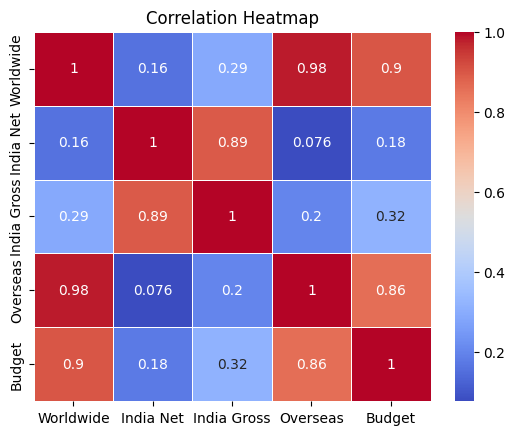

In [17]:
# correlation heatmap
cor = data.iloc[:,0:5].corr()
sns.heatmap(cor, annot = True, linewidths= 0.5,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Build A Neural Network

In [53]:
data2 = data.copy()

In [54]:
data2.head()

,Worldwide,India Net,India Gross,Overseas,Budget,Verdict
0,10500000000,5240000000,6570000000,3920000000,2500000000,All Time Blockbuster
1,17880000000,5100000000,14160000000,3710000000,2500000000,All Time Blockbuster
2,12080000000,4350000000,10000000000,2070000000,1000000000,All Time Blockbuster
3,20700000000,3740000000,5350000000,15350000000,700000000,All Time Blockbuster
4,5880000000,3420000000,4380000000,1500000000,1000000000,All Time Blockbuster


In [55]:
data2.Verdict.value_counts()

,count
Verdict,
Flop,197
Hit,194
Average,134
SuperHit,112
Disaster,85
Blockbuster,74
Below Average,68
Above Average,55
All Time Blockbuster,30


## Train test split

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [57]:
scaler = StandardScaler()

In [58]:
X = data2.iloc[:, :5]
X.head()

,Worldwide,India Net,India Gross,Overseas,Budget
0,10500000000,5240000000,6570000000,3920000000,2500000000
1,17880000000,5100000000,14160000000,3710000000,2500000000
2,12080000000,4350000000,10000000000,2070000000,1000000000
3,20700000000,3740000000,5350000000,15350000000,700000000
4,5880000000,3420000000,4380000000,1500000000,1000000000


In [60]:
y = data2.iloc[:, 5:]
y = pd.get_dummies(y,drop_first=True)
y.head()

,Verdict_All Time Blockbuster,Verdict_Average,Verdict_Below Average,Verdict_Blockbuster,Verdict_Disaster,Verdict_Flop,Verdict_Hit,Verdict_SuperHit
0,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False


In [61]:
X_train,X_test,y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 42)

In [62]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [63]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [64]:
X_train.head()

,Worldwide,India Net,India Gross,Overseas,Budget
0,-0.215137,-0.670193,-0.593715,-0.103158,-0.120179
1,-0.124795,-0.059653,-0.101171,-0.103158,-0.234711
2,-0.176165,-0.429191,-0.400560,-0.101091,-0.161083
3,-0.110623,-0.027519,-0.072198,-0.092820,-0.177445
4,0.077146,0.840091,0.632816,-0.024588,0.370670


In [65]:
X_test.head()

,Worldwide,India Net,India Gross,Overseas,Budget
0,-0.114343,0.549479,0.292535,-0.126668,-0.157890
1,-0.154822,-0.581984,-0.451755,-0.136509,-0.227854
2,-0.156897,-0.629128,-0.535788,-0.134664,-0.218728
3,-0.157935,-0.652700,-0.559798,-0.134664,-0.227854
4,-0.159492,-0.699844,-0.571802,-0.135894,-0.200477


In [66]:
X_test.shape, y_test.shape

((190, 5), (190, 8))

In [67]:
X_train.shape, y_train.shape

((759, 5), (759, 8))

In [68]:
import tensorflow

In [69]:
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Dense

In [70]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(64, activation = "relu", input_dim = X_train.shape[1])) # Increased neurons in the first layer
model.add(Dropout(0.2)) # Added dropout layer
model.add(Dense(32, activation = "relu")) # Added a second hidden layer
model.add(Dense(y_train.shape[1], activation="softmax")) # Output layer with softmax

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,728 (10.66 KB)

 Trainable params: 2,728 (10.66 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate=0.1), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [73]:
history = model.fit(X_train,y_train, epochs=300, validation_split=0.2)

Epoch 1/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2208 - loss: 2.0067 - val_accuracy: 0.2829 - val_loss: 1.6975
Epoch 2/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2887 - loss: 1.7054 - val_accuracy: 0.4013 - val_loss: 1.8833
Epoch 3/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3814 - loss: 1.4923 - val_accuracy: 0.3750 - val_loss: 1.4426
Epoch 4/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3168 - loss: 1.5334 - val_accuracy: 0.4145 - val_loss: 2.3868
Epoch 5/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2343 - loss: 4.1358 - val_accuracy: 0.2303 - val_loss: 3.9504
Epoch 6/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2934 - loss: 9.3518 - val_accuracy: 0.1118 - val_loss: 28.1807
Epoch 7/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1888 - loss: 25.6566 - val_accuracy: 0.2500 - val_loss: 18.4706
Epoch 8/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2306 - loss: 21.8402 - val_accuracy: 0.230

In [74]:
model.layers[0].get_weights()

[array([[-6.83202332e+02, -2.67362744e-01,  3.37565131e-02,
         -1.77986532e-01, -6.80093018e+02, -3.66320343e+02,
         -6.63539429e+02, -6.54008423e+02, -6.10978149e+02,
         -6.58665039e+02, -9.91590381e-01, -1.48940757e-02,
         -1.89799115e-01, -5.17686218e+02, -6.08381714e+02,
          9.87044754e+01, -5.63269653e+02, -7.16515720e-01,
         -6.26188782e+02, -1.56943619e+00, -5.61156677e+02,
         -6.73820129e+02, -5.65106934e+02,  9.23310089e+01,
          9.52519455e+01, -6.84341492e+02, -5.95708191e+02,
         -8.32295299e-01, -5.50822632e+02, -6.64697571e+02,
         -5.26977356e+02, -6.83506348e+02, -2.81310946e-01,
         -5.60750732e+02, -6.53585083e+02, -6.23397400e+02,
         -6.05117554e+02, -3.91616732e-01, -5.91169678e+02,
         -6.51966431e+02, -3.26602697e-01, -6.84992004e+02,
         -6.19870067e-01, -6.14854004e+02,  9.22927628e+01,
          9.38185043e+01, -6.07464722e+02, -6.21904602e+02,
         -6.84760193e+02, -4.34161991e-0

In [76]:
prob = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [77]:
prob

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [9.6688241e-01, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.3948336e-18, 3.3117224e-02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [78]:
prob.shape

(190, 8)

In [79]:
y_pred = np.zeros_like(prob)
y_pred[np.arange(len(prob)), np.argmax(prob, axis=1)] = 1

In [80]:
y_pred = y_pred.astype(bool)
y_pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [81]:
from sklearn.metrics import accuracy_score, classification_report

In [82]:
accuracy_score(y_test, y_pred)

0.07894736842105263

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        15
           3       0.07      0.61      0.12        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        44
           6       0.31      0.10      0.15        39
           7       0.00      0.00      0.00        23

   micro avg       0.08      0.08      0.08       181
   macro avg       0.05      0.09      0.03       181
weighted avg       0.07      0.08      0.05       181
 samples avg       0.08      0.08      0.08       181



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


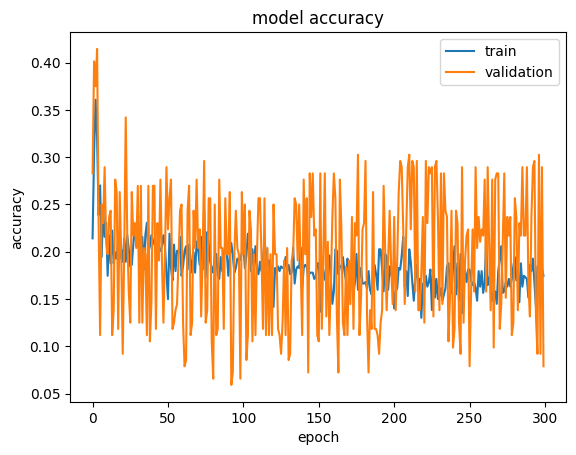

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

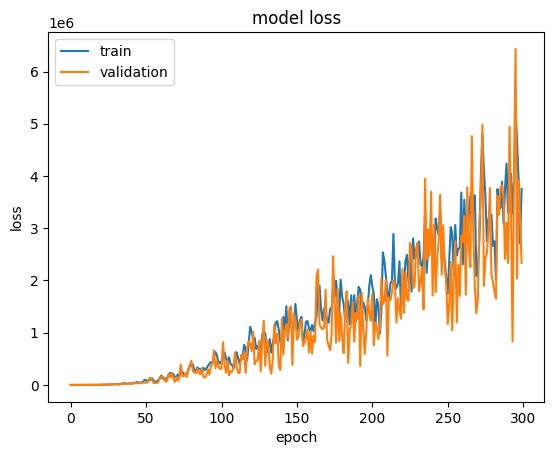

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [87]:
KNN_classifier = KNeighborsClassifier()

In [88]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [89]:
KNN_model = GridSearchCV(KNN_classifier, param_grid, cv=5)
KNN_model

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [90]:
KNN_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [91]:
KNN_model.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

In [92]:
KNN_model.best_score_

np.float64(0.4465318926455211)

In [93]:
y_pred_KNN = KNN_model.predict(X_test)
y_pred_KNN

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [94]:
accuracy_score(y_test, y_pred_KNN)

0.24210526315789474

In [95]:
print(classification_report(y_test, y_pred_KNN))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.25      0.11      0.15        27
           2       0.00      0.00      0.00        15
           3       0.25      0.22      0.24        18
           4       0.17      0.80      0.28        10
           5       0.38      0.36      0.37        44
           6       0.46      0.31      0.37        39
           7       0.23      0.13      0.17        23

   micro avg       0.29      0.25      0.27       181
   macro avg       0.22      0.24      0.20       181
weighted avg       0.29      0.25      0.25       181
 samples avg       0.24      0.24      0.24       181



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


  # Descision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [97]:
tree_classifier = DecisionTreeClassifier()

In [98]:
tree_parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [99]:
tree_model = GridSearchCV(tree_classifier,param_grid= tree_parameters, cv=5)
tree_model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [100]:
tree_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [101]:
tree_model.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [102]:
tree_model.best_score_

np.float64(0.4478912513070756)

In [ ]:
tree_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20)

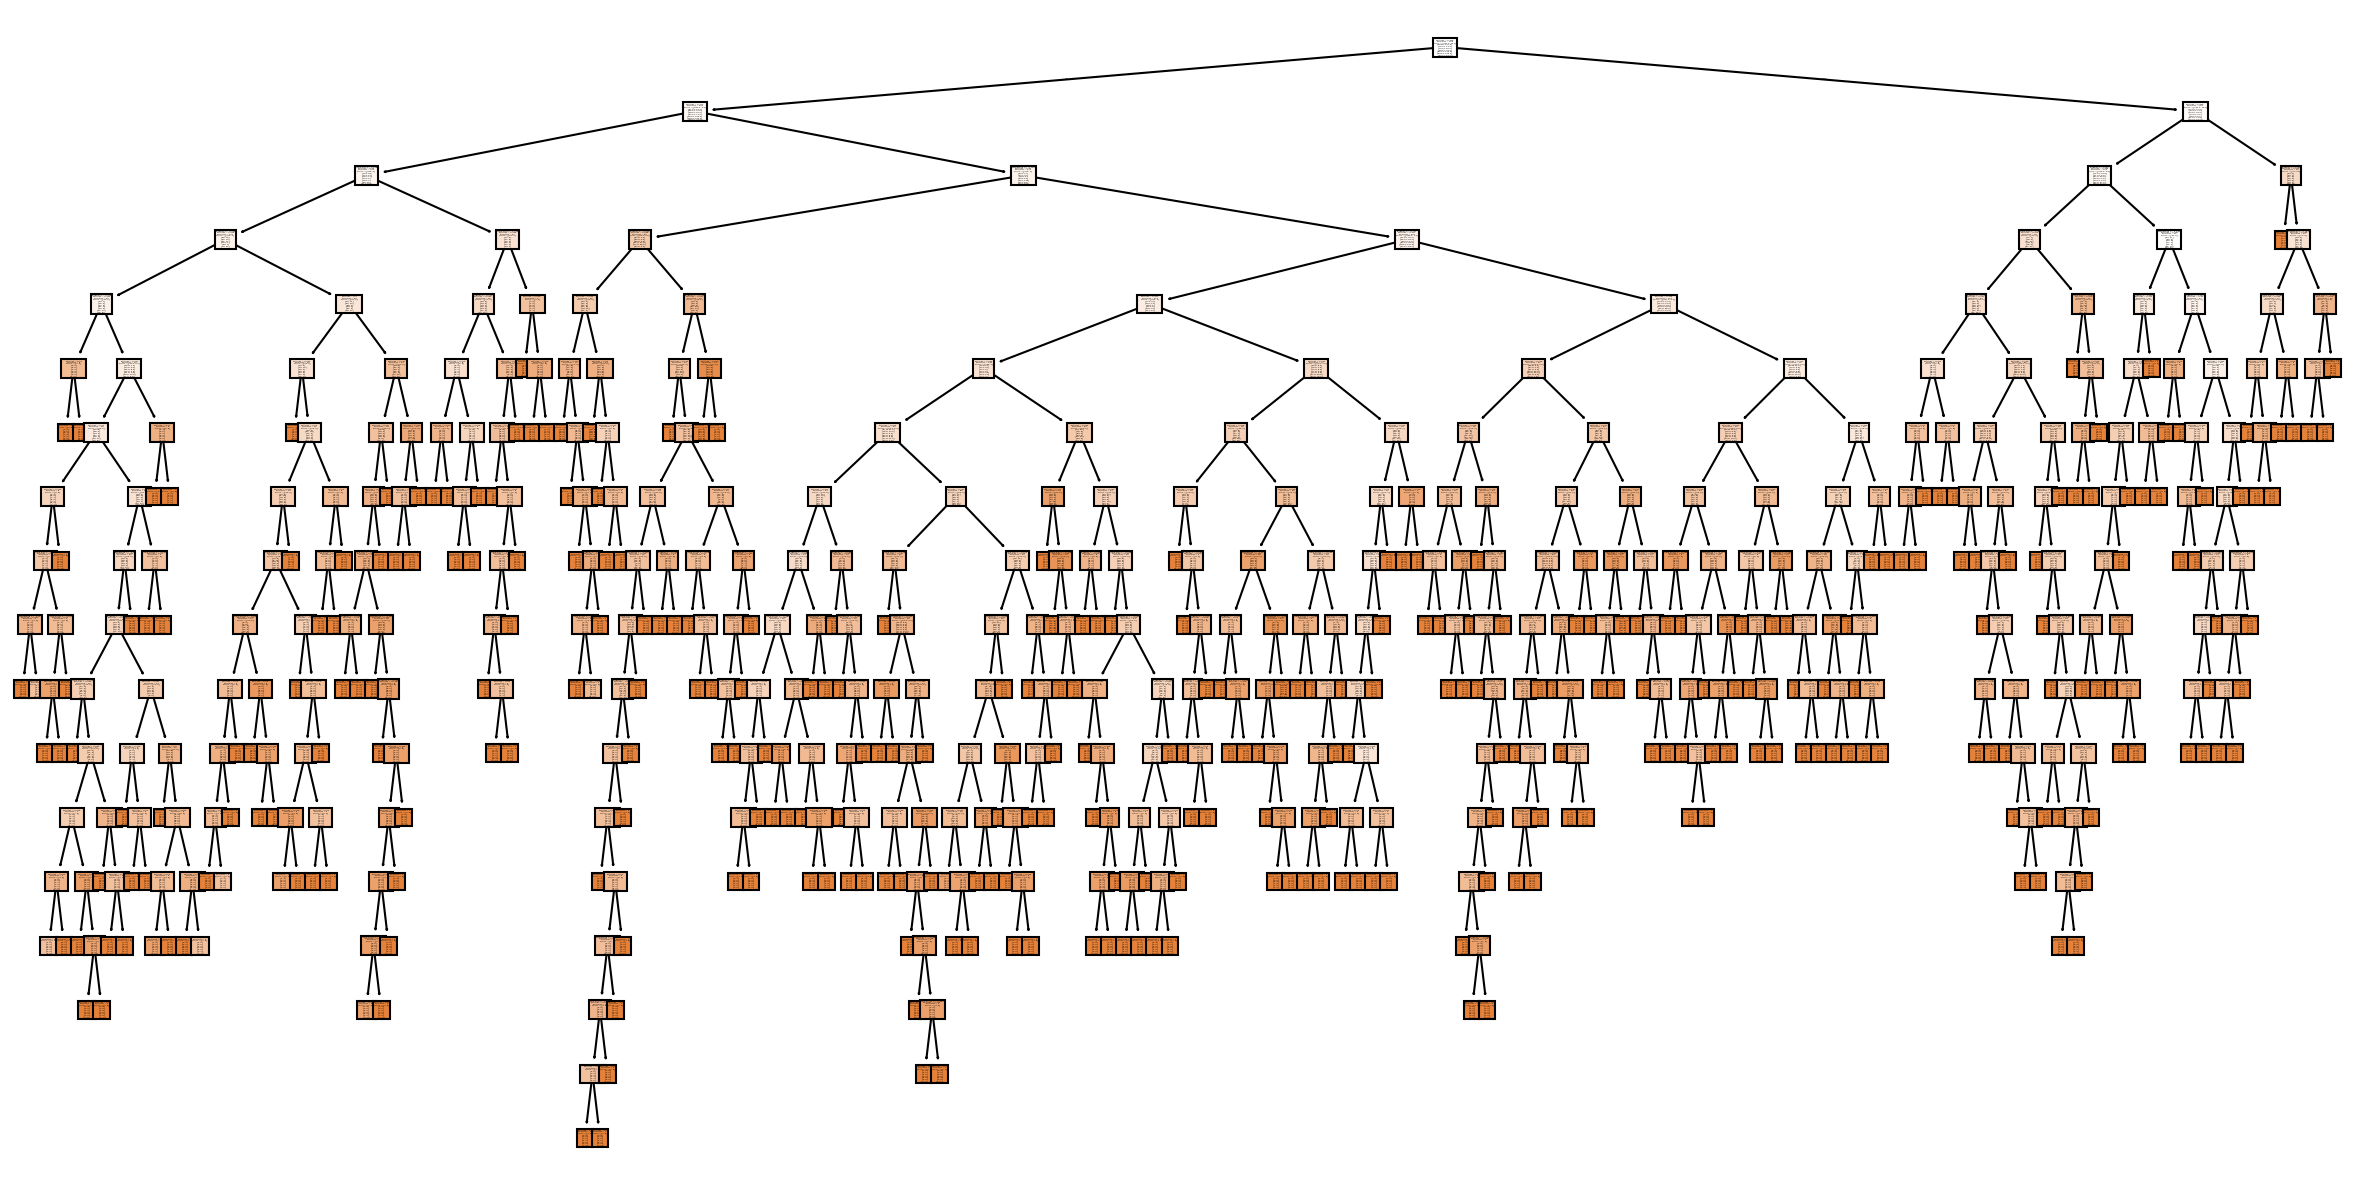

In [103]:
plt.figure(figsize=(20, 10), dpi=150)
plot_tree(tree_model.best_estimator_, filled=True, feature_names=X.columns, class_names=[str(c) for c in tree_model.classes_])
plt.show()

In [104]:
y_pred_tree = tree_model.predict(X_test)
y_pred_tree

array([[False, False, False, ..., False, False,  True],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [105]:
accuracy_score(y_test, y_pred_tree)

0.3157894736842105

In [106]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.25      0.41      0.31        27
           2       0.09      0.20      0.12        15
           3       0.28      0.28      0.28        18
           4       0.38      0.30      0.33        10
           5       0.54      0.48      0.51        44
           6       0.44      0.28      0.34        39
           7       0.55      0.26      0.35        23

   micro avg       0.33      0.33      0.33       181
   macro avg       0.31      0.28      0.28       181
weighted avg       0.39      0.33      0.34       181
 samples avg       0.32      0.32      0.32       181



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
Rf_classifier = RandomForestClassifier()

In [109]:
Rf_parameters = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [110]:
Rf_model = GridSearchCV(Rf_classifier,param_grid= Rf_parameters, cv=5)
Rf_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [111]:
Rf_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [112]:
Rf_model.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [113]:
Rf_model.best_score_

np.float64(0.3740676193795748)

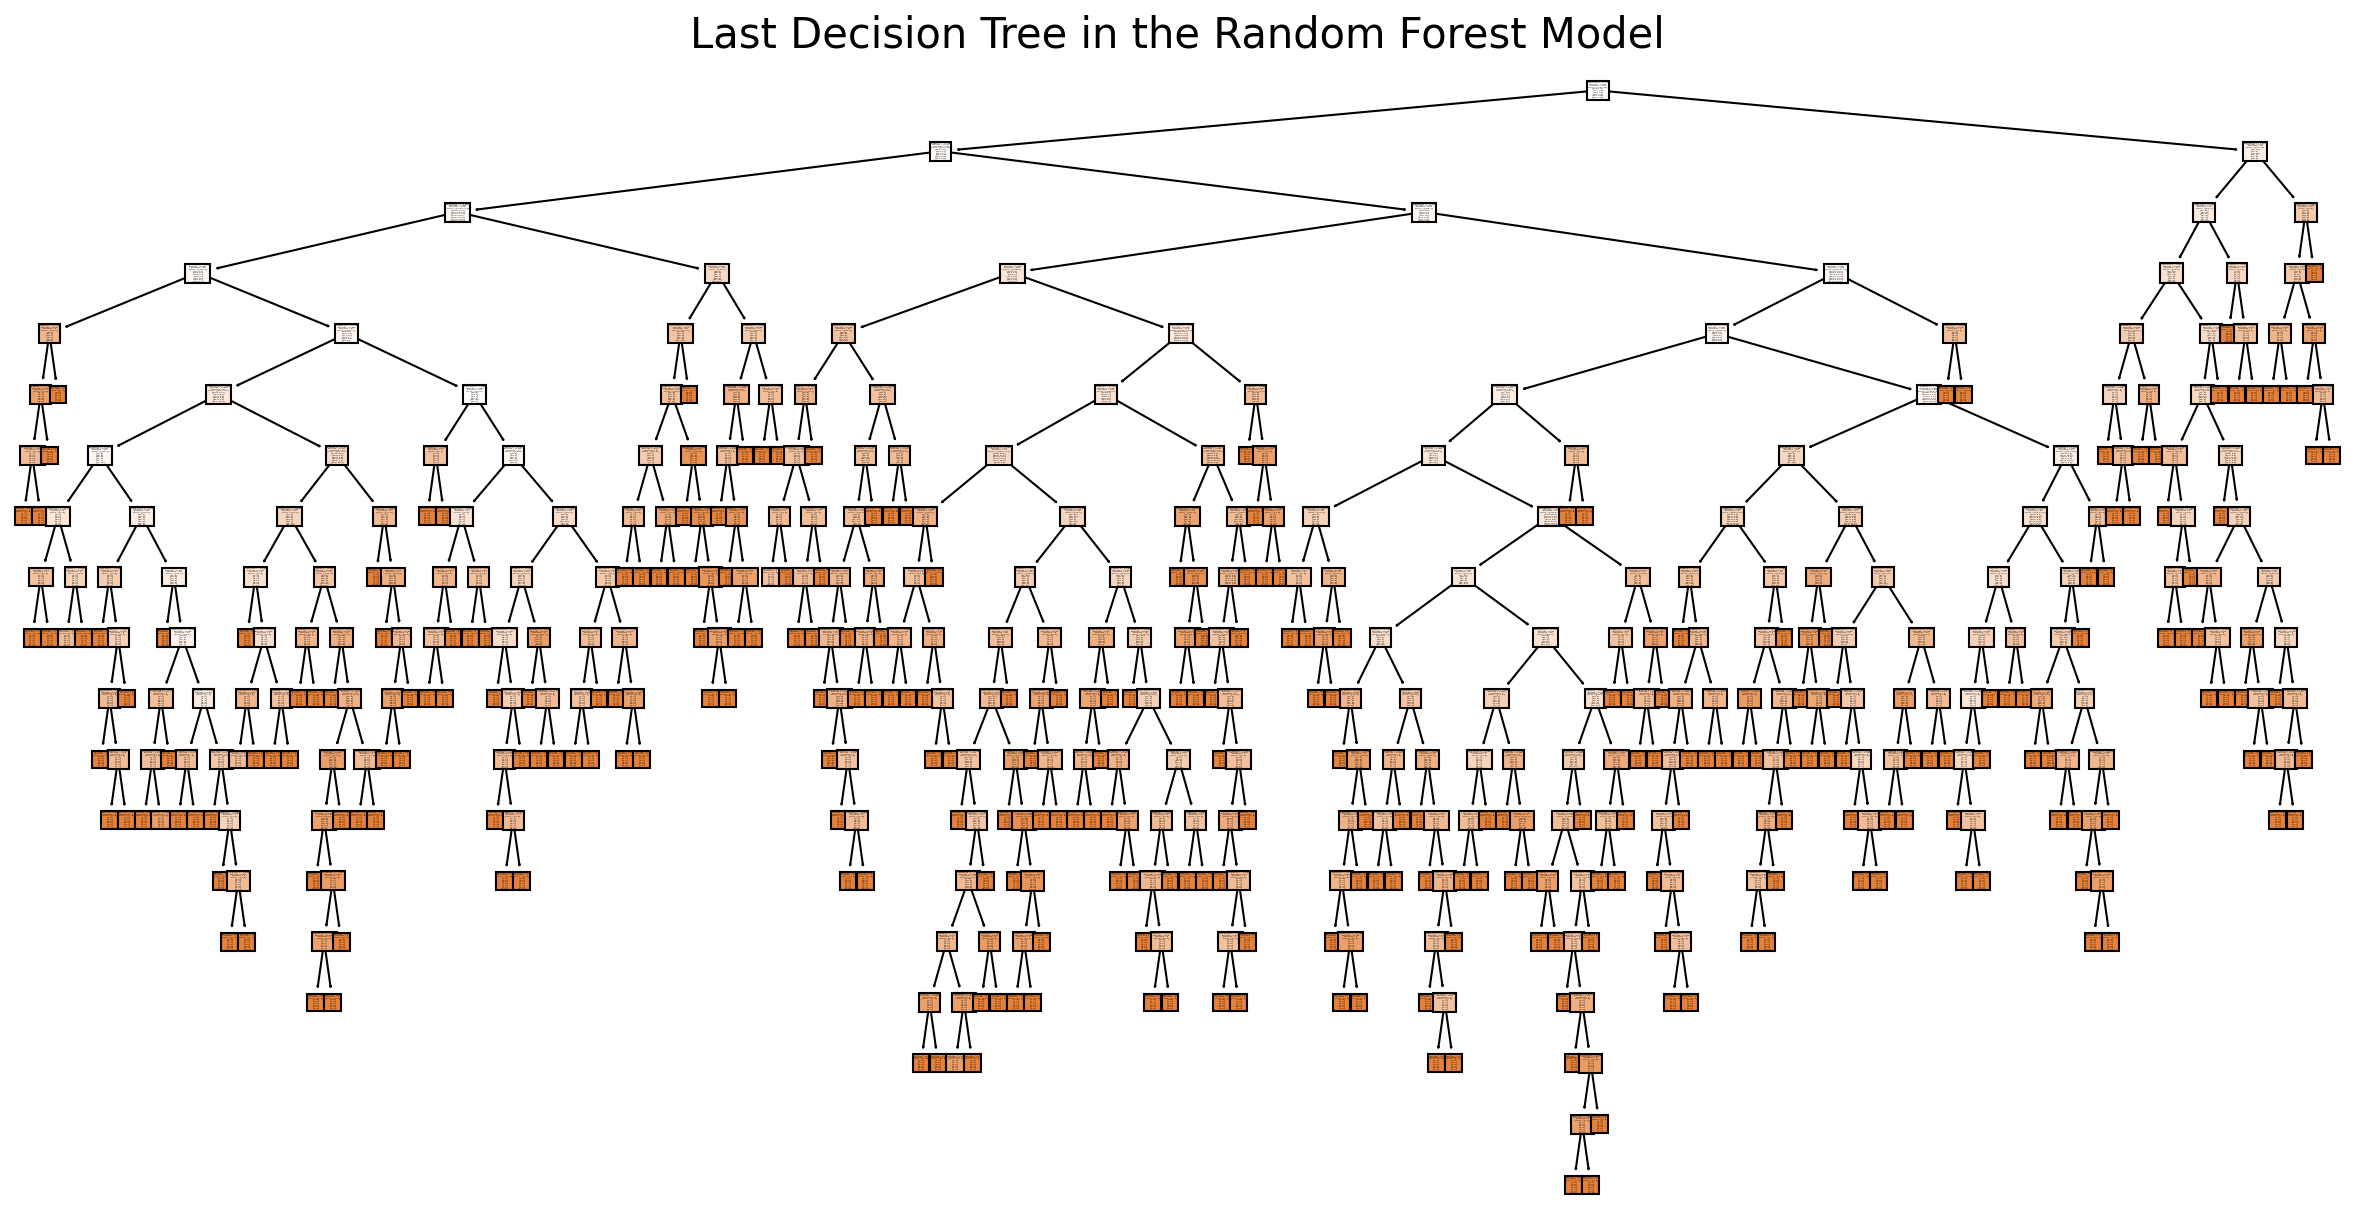

In [114]:
# The last descison tree in the Random Forest Model
plt.figure(figsize=(20, 10), dpi=150)
plot_tree(Rf_model.best_estimator_.estimators_[49], filled=True, feature_names=X.columns, class_names=[str(c) for c in Rf_model.classes_])
plt.title("Last Decision Tree in the Random Forest Model", size = 20)
plt.show()

In [115]:
y_pred_rf = Rf_model.predict(X_test)

In [116]:
accuracy_score(y_test, y_pred_rf)

0.13157894736842105